### Phase 4: Build machine learning models for forecast

In [1]:
# measure execution time
%load_ext autotime

time: 0 ns (started: 2023-06-29 23:20:50 +03:00)


In [2]:
# standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

time: 4.89 s (started: 2023-06-29 23:20:50 +03:00)


### Load the dataset

In [3]:
# read dataset
time_series = pd.read_csv('C:/Users/SK/Desktop/Diploma_Thesis/Datasets/San-Francisco-Yellow-Cabs/Files/time_series.txt')

# drop unecessary columns
time_series.drop(["Traj ID","Taxi ID"],axis=1,inplace=True)

# print first two rows
time_series.shape

(1000, 338)

time: 156 ms (started: 2023-06-29 23:20:55 +03:00)


In [4]:
time_series.head(5)

,Path,Length,"(Timestamp('2008-05-18 00:00:00'), Timestamp('2008-05-18 00:30:00'))","(Timestamp('2008-05-18 00:30:00'), Timestamp('2008-05-18 01:00:00'))","(Timestamp('2008-05-18 01:00:00'), Timestamp('2008-05-18 01:30:00'))","(Timestamp('2008-05-18 01:30:00'), Timestamp('2008-05-18 02:00:00'))","(Timestamp('2008-05-18 02:00:00'), Timestamp('2008-05-18 02:30:00'))","(Timestamp('2008-05-18 02:30:00'), Timestamp('2008-05-18 03:00:00'))","(Timestamp('2008-05-18 03:00:00'), Timestamp('2008-05-18 03:30:00'))","(Timestamp('2008-05-18 03:30:00'), Timestamp('2008-05-18 04:00:00'))",...,"(Timestamp('2008-05-24 19:00:00'), Timestamp('2008-05-24 19:30:00'))","(Timestamp('2008-05-24 19:30:00'), Timestamp('2008-05-24 20:00:00'))","(Timestamp('2008-05-24 20:00:00'), Timestamp('2008-05-24 20:30:00'))","(Timestamp('2008-05-24 20:30:00'), Timestamp('2008-05-24 21:00:00'))","(Timestamp('2008-05-24 21:00:00'), Timestamp('2008-05-24 21:30:00'))","(Timestamp('2008-05-24 21:30:00'), Timestamp('2008-05-24 22:00:00'))","(Timestamp('2008-05-24 22:00:00'), Timestamp('2008-05-24 22:30:00'))","(Timestamp('2008-05-24 22:30:00'), Timestamp('2008-05-24 23:00:00'))","(Timestamp('2008-05-24 23:00:00'), Timestamp('2008-05-24 23:30:00'))","(Timestamp('2008-05-24 23:30:00'), Timestamp('2008-05-25 00:00:00'))"
0,"[60678630, 60678630]",2,0,3,1,0,1,0,0,0,...,1,0,2,0,0,1,1,0,2,1
1,"[776651709, 776651709]",2,4,9,7,7,5,16,6,13,...,3,12,1,4,5,6,0,4,4,4
2,"[680243315, 680243315, 397146706, 397146706, 3...",5,2,3,3,4,3,2,2,7,...,1,4,4,2,4,2,3,1,1,0
3,"[437964226, 437964226, 437964226, 1119577539, ...",14,2,3,1,2,2,3,6,2,...,3,7,7,4,2,2,4,6,2,2
4,"[287958607, 254466695, 254466695, 397269730, 3...",11,4,0,1,4,0,2,0,2,...,2,1,4,1,0,1,0,2,0,1


time: 47 ms (started: 2023-06-29 23:20:55 +03:00)


In [5]:
# this list contains the column names
columns = ["Path","Length"]

# generate the columns of the dataset
i =2
while(True):
    if i == 2:
        columns.append(pd.to_datetime('2008-05-18 00:00:00'))
    else:
        columns.append(columns[i-1] + timedelta(seconds=1800))
    
    if (columns[i]>=pd.to_datetime('2008-05-24 23:59:59.000130')):
        break
    
    i+=1

# delete the last timestamp
columns.pop()

# assign new column names to our dataframe
time_series.columns = columns

# print first two rows
time_series.head(2)

,Path,Length,2008-05-18 00:00:00,2008-05-18 00:30:00,2008-05-18 01:00:00,2008-05-18 01:30:00,2008-05-18 02:00:00,2008-05-18 02:30:00,2008-05-18 03:00:00,2008-05-18 03:30:00,...,2008-05-24 19:00:00,2008-05-24 19:30:00,2008-05-24 20:00:00,2008-05-24 20:30:00,2008-05-24 21:00:00,2008-05-24 21:30:00,2008-05-24 22:00:00,2008-05-24 22:30:00,2008-05-24 23:00:00,2008-05-24 23:30:00
0,"[60678630, 60678630]",2,0,3,1,0,1,0,0,0,...,1,0,2,0,0,1,1,0,2,1
1,"[776651709, 776651709]",2,4,9,7,7,5,16,6,13,...,3,12,1,4,5,6,0,4,4,4


time: 141 ms (started: 2023-06-29 23:20:55 +03:00)


### Transform the dataset

In [6]:
# reshape the data from column format to row format
id_cols = ['Path', 'Length']
time_cols = time_series.iloc[:,2:].columns
time_series = time_series.melt(id_vars=id_cols, value_vars=time_cols, var_name='Time Column', value_name='Traffic Flow')
time_series['Time Column'] = pd.to_datetime(time_series['Time Column'])

# sort rows by Path and Time
time_series.sort_values(by=['Path','Time Column'],inplace=True)

# print first rows of the dataset
time_series.head(5)

,Path,Length,Time Column,Traffic Flow
593,"[100400941, 100400941, 100400941, 100400941, 1...",8,2008-05-18 00:00:00,4
1593,"[100400941, 100400941, 100400941, 100400941, 1...",8,2008-05-18 00:30:00,4
2593,"[100400941, 100400941, 100400941, 100400941, 1...",8,2008-05-18 01:00:00,4
3593,"[100400941, 100400941, 100400941, 100400941, 1...",8,2008-05-18 01:30:00,2
4593,"[100400941, 100400941, 100400941, 100400941, 1...",8,2008-05-18 02:00:00,9


time: 937 ms (started: 2023-06-29 23:20:55 +03:00)


In [7]:
# convert path column from categorical to numerical
from sklearn.preprocessing import LabelEncoder

# create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder on the 'Path' column
time_series['Path'] = label_encoder.fit_transform(time_series['Path'])

# sort the data based in Path column
time_series = time_series.sort_values(by=['Path','Time Column'])

time: 1.33 s (started: 2023-06-29 23:20:56 +03:00)


In [8]:
time_series

,Path,Length,Time Column,Traffic Flow
593,0,8,2008-05-18 00:00:00,4
1593,0,8,2008-05-18 00:30:00,4
2593,0,8,2008-05-18 01:00:00,4
3593,0,8,2008-05-18 01:30:00,2
4593,0,8,2008-05-18 02:00:00,9
...,...,...,...,...
331403,999,4,2008-05-24 21:30:00,3
332403,999,4,2008-05-24 22:00:00,7
333403,999,4,2008-05-24 22:30:00,6
334403,999,4,2008-05-24 23:00:00,3


time: 31 ms (started: 2023-06-29 23:20:58 +03:00)


### Convert the time series dataset to a supervised problem

In [9]:
'''
from pandas import DataFrame
from pandas import concat

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	"""
	Frame a time series as a supervised learning dataset.
	Arguments:
		data: Sequence of observations as a list or NumPy array.
		n_in: Number of lag observations as input (X).
		n_out: Number of observations as output (y).
		dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
		Pandas DataFrame of series framed for supervised learning.
	"""
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('Traffic Flow %d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('Traffic Flow %d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('Traffic Flow %d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

data = pd.DataFrame()

for item in time_series['Path'].unique():
    x = series_to_supervised(time_series[time_series['Path'] == item].drop(['Length','Path'],axis=1), 16,1)
    x['Path'] = item
    x['Length'] = time_series[time_series['Path'] == item]['Length']
    
    data = pd.concat([data,x])
'''

'\nfrom pandas import DataFrame\nfrom pandas import concat\n\ndef series_to_supervised(data, n_in=1, n_out=1, dropnan=True):\n\t"""\n\tFrame a time series as a supervised learning dataset.\n\tArguments:\n\t\tdata: Sequence of observations as a list or NumPy array.\n\t\tn_in: Number of lag observations as input (X).\n\t\tn_out: Number of observations as output (y).\n\t\tdropnan: Boolean whether or not to drop rows with NaN values.\n\tReturns:\n\t\tPandas DataFrame of series framed for supervised learning.\n\t"""\n\tn_vars = 1 if type(data) is list else data.shape[1]\n\tdf = DataFrame(data)\n\tcols, names = list(), list()\n\t# input sequence (t-n, ... t-1)\n\tfor i in range(n_in, 0, -1):\n\t\tcols.append(df.shift(i))\n\t\tnames += [(\'Traffic Flow %d(t-%d)\' % (j+1, i)) for j in range(n_vars)]\n\t# forecast sequence (t, t+1, ... t+n)\n\tfor i in range(0, n_out):\n\t\tcols.append(df.shift(-i))\n\t\tif i == 0:\n\t\t\tnames += [(\'Traffic Flow %d(t)\' % (j+1)) for j in range(n_vars)]\n\t\te

time: 0 ns (started: 2023-06-29 23:20:58 +03:00)


### Feature Creation From Time Information
We define some features based on time series timestamps.

In [10]:
time_series['hour'] = time_series['Time Column'].dt.hour
time_series['dayofweek'] = time_series['Time Column'].dt.dayofweek
time_series['day'] = time_series['Time Column'].dt.day
time_series['minute'] = time_series['Time Column'].dt.minute

time: 266 ms (started: 2023-06-29 23:20:58 +03:00)


In [11]:
# Circular Encoding for cyclic time features
time_series['hour_sin'] = np.sin(2 * np.pi * time_series['hour'] / 24)
time_series['hour_cos'] = np.cos(2 * np.pi * time_series['hour'] / 24)

time: 62 ms (started: 2023-06-29 23:20:58 +03:00)


In [12]:
time_series.head(3)

,Path,Length,Time Column,Traffic Flow,hour,dayofweek,day,minute,hour_sin,hour_cos
593,0,8,2008-05-18 00:00:00,4,0,6,18,0,0.000000,1.000000
1593,0,8,2008-05-18 00:30:00,4,0,6,18,30,0.000000,1.000000
2593,0,8,2008-05-18 01:00:00,4,1,6,18,0,0.258819,0.965926


time: 16 ms (started: 2023-06-29 23:20:58 +03:00)


### Train - Test split

In [13]:
# define train data
train = time_series.loc[time_series['Time Column'] < '2008-05-24']
train.sort_values(by='Time Column', inplace=True)

# define test data
test = time_series.loc[time_series['Time Column'] >= '2008-05-24']
test.sort_values(by='Time Column', inplace=True)

print("Train set shape: ",train.shape)
print("Test set shape: ",test.shape)

Train set shape:  (288000, 10)
Test set shape:  (48000, 10)
time: 266 ms (started: 2023-06-29 23:20:58 +03:00)


C:\Users\SK\AppData\Local\Temp\ipykernel_1840\4161827038.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.sort_values(by='Time Column', inplace=True)
C:\Users\SK\AppData\Local\Temp\ipykernel_1840\4161827038.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.sort_values(by='Time Column', inplace=True)


### Define Features and Labels

In [15]:
# define features
features = ['Path', 'Length', 'hour', 'dayofweek', 'day', 'minute',
            'hour_sin', 'hour_cos']

# define labels
labels = ['Traffic Flow']

# create train set
X_train = train[features]
y_train = train[labels]

# create test set
X_test = test[features]
y_test = test[labels]

time: 31 ms (started: 2023-06-29 23:21:20 +03:00)


### Train a single XGboost model
We will fit all the data in this model!

In [16]:
import xgboost as xgb

time: 172 ms (started: 2023-06-29 23:21:21 +03:00)


In [17]:
# Define XGBoost regressor
reg = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=5000,
    early_stopping_rounds=5,
    learning_rate=0.01,
    max_depth=5,
    gamma=0.3,
    alpha = 0.1
)

# Train the XGBoost model with feature weights
reg.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=True)

[0]	validation_0-rmse:7.39152	validation_1-rmse:6.69652
[1]	validation_0-rmse:7.36582	validation_1-rmse:6.66981
[2]	validation_0-rmse:7.34012	validation_1-rmse:6.64344
[3]	validation_0-rmse:7.31487	validation_1-rmse:6.61738
[4]	validation_0-rmse:7.29001	validation_1-rmse:6.59190
[5]	validation_0-rmse:7.26558	validation_1-rmse:6.56673
[6]	validation_0-rmse:7.24192	validation_1-rmse:6.54220
[7]	validation_0-rmse:7.21825	validation_1-rmse:6.51800
[8]	validation_0-rmse:7.19501	validation_1-rmse:6.49410
[9]	validation_0-rmse:7.17213	validation_1-rmse:6.47073
[10]	validation_0-rmse:7.14965	validation_1-rmse:6.44787
[11]	validation_0-rmse:7.12751	validation_1-rmse:6.42513
[12]	validation_0-rmse:7.10609	validation_1-rmse:6.40323
[13]	validation_0-rmse:7.08467	validation_1-rmse:6.38130
[14]	validation_0-rmse:7.06228	validation_1-rmse:6.35894
[15]	validation_0-rmse:7.04174	validation_1-rmse:6.33812
[16]	validation_0-rmse:7.02005	validation_1-rmse:6.31659
[17]	validation_0-rmse:6.99871	validation

[144]	validation_0-rmse:5.82837	validation_1-rmse:5.18619
[145]	validation_0-rmse:5.82319	validation_1-rmse:5.18198
[146]	validation_0-rmse:5.81954	validation_1-rmse:5.17927
[147]	validation_0-rmse:5.81679	validation_1-rmse:5.17697
[148]	validation_0-rmse:5.81224	validation_1-rmse:5.17356
[149]	validation_0-rmse:5.80908	validation_1-rmse:5.17076
[150]	validation_0-rmse:5.80464	validation_1-rmse:5.16750
[151]	validation_0-rmse:5.80163	validation_1-rmse:5.16535
[152]	validation_0-rmse:5.79882	validation_1-rmse:5.16295
[153]	validation_0-rmse:5.79310	validation_1-rmse:5.15818
[154]	validation_0-rmse:5.78992	validation_1-rmse:5.15584
[155]	validation_0-rmse:5.78744	validation_1-rmse:5.15386
[156]	validation_0-rmse:5.78375	validation_1-rmse:5.15129
[157]	validation_0-rmse:5.78155	validation_1-rmse:5.14938
[158]	validation_0-rmse:5.77747	validation_1-rmse:5.14651
[159]	validation_0-rmse:5.77534	validation_1-rmse:5.14466
[160]	validation_0-rmse:5.76987	validation_1-rmse:5.14013
[161]	validati

[285]	validation_0-rmse:5.47933	validation_1-rmse:4.92849
[286]	validation_0-rmse:5.47839	validation_1-rmse:4.92783
[287]	validation_0-rmse:5.47731	validation_1-rmse:4.92733
[288]	validation_0-rmse:5.47668	validation_1-rmse:4.92682
[289]	validation_0-rmse:5.47584	validation_1-rmse:4.92619
[290]	validation_0-rmse:5.47423	validation_1-rmse:4.92505
[291]	validation_0-rmse:5.47242	validation_1-rmse:4.92367
[292]	validation_0-rmse:5.46815	validation_1-rmse:4.92029
[293]	validation_0-rmse:5.46444	validation_1-rmse:4.91726
[294]	validation_0-rmse:5.46364	validation_1-rmse:4.91669
[295]	validation_0-rmse:5.46316	validation_1-rmse:4.91655
[296]	validation_0-rmse:5.46148	validation_1-rmse:4.91535
[297]	validation_0-rmse:5.46072	validation_1-rmse:4.91488
[298]	validation_0-rmse:5.45989	validation_1-rmse:4.91422
[299]	validation_0-rmse:5.45831	validation_1-rmse:4.91317
[300]	validation_0-rmse:5.45572	validation_1-rmse:4.91146
[301]	validation_0-rmse:5.45526	validation_1-rmse:4.91133
[302]	validati

[426]	validation_0-rmse:5.26780	validation_1-rmse:4.76002
[427]	validation_0-rmse:5.26524	validation_1-rmse:4.75800
[428]	validation_0-rmse:5.26447	validation_1-rmse:4.75743
[429]	validation_0-rmse:5.26360	validation_1-rmse:4.75653
[430]	validation_0-rmse:5.26314	validation_1-rmse:4.75657
[431]	validation_0-rmse:5.26239	validation_1-rmse:4.75602
[432]	validation_0-rmse:5.26154	validation_1-rmse:4.75512
[433]	validation_0-rmse:5.25858	validation_1-rmse:4.75271
[434]	validation_0-rmse:5.25606	validation_1-rmse:4.75072
[435]	validation_0-rmse:5.25551	validation_1-rmse:4.75003
[436]	validation_0-rmse:5.25491	validation_1-rmse:4.74939
[437]	validation_0-rmse:5.25199	validation_1-rmse:4.74700
[438]	validation_0-rmse:5.24966	validation_1-rmse:4.74518
[439]	validation_0-rmse:5.24892	validation_1-rmse:4.74464
[440]	validation_0-rmse:5.24809	validation_1-rmse:4.74378
[441]	validation_0-rmse:5.24560	validation_1-rmse:4.74194
[442]	validation_0-rmse:5.24510	validation_1-rmse:4.74191
[443]	validati

[567]	validation_0-rmse:5.06503	validation_1-rmse:4.58891
[568]	validation_0-rmse:5.06457	validation_1-rmse:4.58856
[569]	validation_0-rmse:5.06111	validation_1-rmse:4.58605
[570]	validation_0-rmse:5.05972	validation_1-rmse:4.58477
[571]	validation_0-rmse:5.05792	validation_1-rmse:4.58319
[572]	validation_0-rmse:5.05736	validation_1-rmse:4.58261
[573]	validation_0-rmse:5.05706	validation_1-rmse:4.58267
[574]	validation_0-rmse:5.05562	validation_1-rmse:4.58122
[575]	validation_0-rmse:5.05516	validation_1-rmse:4.58088
[576]	validation_0-rmse:5.05310	validation_1-rmse:4.57896
[577]	validation_0-rmse:5.05131	validation_1-rmse:4.57768
[578]	validation_0-rmse:5.04995	validation_1-rmse:4.57626
[579]	validation_0-rmse:5.04940	validation_1-rmse:4.57569
[580]	validation_0-rmse:5.04834	validation_1-rmse:4.57509
[581]	validation_0-rmse:5.04695	validation_1-rmse:4.57368
[582]	validation_0-rmse:5.04374	validation_1-rmse:4.57120
[583]	validation_0-rmse:5.04172	validation_1-rmse:4.56941
[584]	validati

[709]	validation_0-rmse:4.88238	validation_1-rmse:4.44517
[710]	validation_0-rmse:4.88200	validation_1-rmse:4.44510
[711]	validation_0-rmse:4.87952	validation_1-rmse:4.44330
[712]	validation_0-rmse:4.87851	validation_1-rmse:4.44237
[713]	validation_0-rmse:4.87806	validation_1-rmse:4.44191
[714]	validation_0-rmse:4.87766	validation_1-rmse:4.44165
[715]	validation_0-rmse:4.87538	validation_1-rmse:4.44021
[716]	validation_0-rmse:4.87426	validation_1-rmse:4.43907
[717]	validation_0-rmse:4.87288	validation_1-rmse:4.43808
[718]	validation_0-rmse:4.87240	validation_1-rmse:4.43789
[719]	validation_0-rmse:4.87124	validation_1-rmse:4.43676
[720]	validation_0-rmse:4.86998	validation_1-rmse:4.43585
[721]	validation_0-rmse:4.86977	validation_1-rmse:4.43566
[722]	validation_0-rmse:4.86913	validation_1-rmse:4.43526
[723]	validation_0-rmse:4.86730	validation_1-rmse:4.43412
[724]	validation_0-rmse:4.86607	validation_1-rmse:4.43323
[725]	validation_0-rmse:4.86562	validation_1-rmse:4.43304
[726]	validati

[851]	validation_0-rmse:4.74524	validation_1-rmse:4.34651
[852]	validation_0-rmse:4.74438	validation_1-rmse:4.34574
[853]	validation_0-rmse:4.74325	validation_1-rmse:4.34470
[854]	validation_0-rmse:4.74289	validation_1-rmse:4.34439
[855]	validation_0-rmse:4.74052	validation_1-rmse:4.34291
[856]	validation_0-rmse:4.73979	validation_1-rmse:4.34226
[857]	validation_0-rmse:4.73940	validation_1-rmse:4.34216
[858]	validation_0-rmse:4.73857	validation_1-rmse:4.34161
[859]	validation_0-rmse:4.73793	validation_1-rmse:4.34112
[860]	validation_0-rmse:4.73636	validation_1-rmse:4.34001
[861]	validation_0-rmse:4.73622	validation_1-rmse:4.33986
[862]	validation_0-rmse:4.73492	validation_1-rmse:4.33877
[863]	validation_0-rmse:4.73410	validation_1-rmse:4.33836
[864]	validation_0-rmse:4.73256	validation_1-rmse:4.33728
[865]	validation_0-rmse:4.73161	validation_1-rmse:4.33637
[866]	validation_0-rmse:4.73125	validation_1-rmse:4.33605
[867]	validation_0-rmse:4.73083	validation_1-rmse:4.33592
[868]	validati

[992]	validation_0-rmse:4.60976	validation_1-rmse:4.24896
[993]	validation_0-rmse:4.60936	validation_1-rmse:4.24883
[994]	validation_0-rmse:4.60819	validation_1-rmse:4.24787
[995]	validation_0-rmse:4.60788	validation_1-rmse:4.24758
[996]	validation_0-rmse:4.60631	validation_1-rmse:4.24662
[997]	validation_0-rmse:4.60448	validation_1-rmse:4.24562
[998]	validation_0-rmse:4.60382	validation_1-rmse:4.24503
[999]	validation_0-rmse:4.60371	validation_1-rmse:4.24491
[1000]	validation_0-rmse:4.60306	validation_1-rmse:4.24440
[1001]	validation_0-rmse:4.60235	validation_1-rmse:4.24399
[1002]	validation_0-rmse:4.60070	validation_1-rmse:4.24289
[1003]	validation_0-rmse:4.59990	validation_1-rmse:4.24232
[1004]	validation_0-rmse:4.59966	validation_1-rmse:4.24217
[1005]	validation_0-rmse:4.59941	validation_1-rmse:4.24210
[1006]	validation_0-rmse:4.59810	validation_1-rmse:4.24120
[1007]	validation_0-rmse:4.59780	validation_1-rmse:4.24091
[1008]	validation_0-rmse:4.59737	validation_1-rmse:4.24053
[1009

[1131]	validation_0-rmse:4.50555	validation_1-rmse:4.17623
[1132]	validation_0-rmse:4.50521	validation_1-rmse:4.17599
[1133]	validation_0-rmse:4.50430	validation_1-rmse:4.17523
[1134]	validation_0-rmse:4.50381	validation_1-rmse:4.17498
[1135]	validation_0-rmse:4.50328	validation_1-rmse:4.17447
[1136]	validation_0-rmse:4.50302	validation_1-rmse:4.17424
[1137]	validation_0-rmse:4.50265	validation_1-rmse:4.17393
[1138]	validation_0-rmse:4.50231	validation_1-rmse:4.17369
[1139]	validation_0-rmse:4.50100	validation_1-rmse:4.17288
[1140]	validation_0-rmse:4.50067	validation_1-rmse:4.17266
[1141]	validation_0-rmse:4.50009	validation_1-rmse:4.17233
[1142]	validation_0-rmse:4.49844	validation_1-rmse:4.17117
[1143]	validation_0-rmse:4.49817	validation_1-rmse:4.17115
[1144]	validation_0-rmse:4.49793	validation_1-rmse:4.17091
[1145]	validation_0-rmse:4.49735	validation_1-rmse:4.17066
[1146]	validation_0-rmse:4.49638	validation_1-rmse:4.16983
[1147]	validation_0-rmse:4.49581	validation_1-rmse:4.169

[1270]	validation_0-rmse:4.41645	validation_1-rmse:4.11063
[1271]	validation_0-rmse:4.41624	validation_1-rmse:4.11045
[1272]	validation_0-rmse:4.41580	validation_1-rmse:4.10991
[1273]	validation_0-rmse:4.41463	validation_1-rmse:4.10891
[1274]	validation_0-rmse:4.41422	validation_1-rmse:4.10856
[1275]	validation_0-rmse:4.41397	validation_1-rmse:4.10841
[1276]	validation_0-rmse:4.41369	validation_1-rmse:4.10815
[1277]	validation_0-rmse:4.41344	validation_1-rmse:4.10799
[1278]	validation_0-rmse:4.41293	validation_1-rmse:4.10774
[1279]	validation_0-rmse:4.41246	validation_1-rmse:4.10726
[1280]	validation_0-rmse:4.41122	validation_1-rmse:4.10615
[1281]	validation_0-rmse:4.41012	validation_1-rmse:4.10526
[1282]	validation_0-rmse:4.40842	validation_1-rmse:4.10424
[1283]	validation_0-rmse:4.40709	validation_1-rmse:4.10346
[1284]	validation_0-rmse:4.40631	validation_1-rmse:4.10266
[1285]	validation_0-rmse:4.40611	validation_1-rmse:4.10250
[1286]	validation_0-rmse:4.40564	validation_1-rmse:4.102

[1409]	validation_0-rmse:4.32500	validation_1-rmse:4.04520
[1410]	validation_0-rmse:4.32479	validation_1-rmse:4.04501
[1411]	validation_0-rmse:4.32384	validation_1-rmse:4.04419
[1412]	validation_0-rmse:4.32368	validation_1-rmse:4.04409
[1413]	validation_0-rmse:4.32281	validation_1-rmse:4.04336
[1414]	validation_0-rmse:4.32227	validation_1-rmse:4.04292
[1415]	validation_0-rmse:4.32122	validation_1-rmse:4.04224
[1416]	validation_0-rmse:4.32097	validation_1-rmse:4.04204
[1417]	validation_0-rmse:4.32076	validation_1-rmse:4.04192
[1418]	validation_0-rmse:4.32041	validation_1-rmse:4.04131
[1419]	validation_0-rmse:4.32025	validation_1-rmse:4.04119
[1420]	validation_0-rmse:4.31934	validation_1-rmse:4.04072
[1421]	validation_0-rmse:4.31893	validation_1-rmse:4.04038
[1422]	validation_0-rmse:4.31868	validation_1-rmse:4.04028
[1423]	validation_0-rmse:4.31775	validation_1-rmse:4.03948
[1424]	validation_0-rmse:4.31672	validation_1-rmse:4.03880
[1425]	validation_0-rmse:4.31652	validation_1-rmse:4.038

[1548]	validation_0-rmse:4.24528	validation_1-rmse:3.98508
[1549]	validation_0-rmse:4.24442	validation_1-rmse:3.98433
[1550]	validation_0-rmse:4.24421	validation_1-rmse:3.98413
[1551]	validation_0-rmse:4.24386	validation_1-rmse:3.98379
[1552]	validation_0-rmse:4.24292	validation_1-rmse:3.98294
[1553]	validation_0-rmse:4.24222	validation_1-rmse:3.98237
[1554]	validation_0-rmse:4.24199	validation_1-rmse:3.98227
[1555]	validation_0-rmse:4.24126	validation_1-rmse:3.98164
[1556]	validation_0-rmse:4.24030	validation_1-rmse:3.98096
[1557]	validation_0-rmse:4.23981	validation_1-rmse:3.98053
[1558]	validation_0-rmse:4.23964	validation_1-rmse:3.98043
[1559]	validation_0-rmse:4.23880	validation_1-rmse:3.97972
[1560]	validation_0-rmse:4.23796	validation_1-rmse:3.97935
[1561]	validation_0-rmse:4.23754	validation_1-rmse:3.97902
[1562]	validation_0-rmse:4.23734	validation_1-rmse:3.97888
[1563]	validation_0-rmse:4.23663	validation_1-rmse:3.97823
[1564]	validation_0-rmse:4.23601	validation_1-rmse:3.977

[1687]	validation_0-rmse:4.16766	validation_1-rmse:3.92501
[1688]	validation_0-rmse:4.16692	validation_1-rmse:3.92427
[1689]	validation_0-rmse:4.16667	validation_1-rmse:3.92410
[1690]	validation_0-rmse:4.16606	validation_1-rmse:3.92363
[1691]	validation_0-rmse:4.16513	validation_1-rmse:3.92314
[1692]	validation_0-rmse:4.16424	validation_1-rmse:3.92233
[1693]	validation_0-rmse:4.16340	validation_1-rmse:3.92193
[1694]	validation_0-rmse:4.16319	validation_1-rmse:3.92185
[1695]	validation_0-rmse:4.16239	validation_1-rmse:3.92130
[1696]	validation_0-rmse:4.16213	validation_1-rmse:3.92113
[1697]	validation_0-rmse:4.16140	validation_1-rmse:3.92041
[1698]	validation_0-rmse:4.16078	validation_1-rmse:3.91993
[1699]	validation_0-rmse:4.16004	validation_1-rmse:3.91952
[1700]	validation_0-rmse:4.15983	validation_1-rmse:3.91945
[1701]	validation_0-rmse:4.15931	validation_1-rmse:3.91896
[1702]	validation_0-rmse:4.15865	validation_1-rmse:3.91835
[1703]	validation_0-rmse:4.15800	validation_1-rmse:3.917

[1826]	validation_0-rmse:4.09372	validation_1-rmse:3.86960
[1827]	validation_0-rmse:4.09307	validation_1-rmse:3.86907
[1828]	validation_0-rmse:4.09231	validation_1-rmse:3.86841
[1829]	validation_0-rmse:4.09185	validation_1-rmse:3.86808
[1830]	validation_0-rmse:4.09125	validation_1-rmse:3.86762
[1831]	validation_0-rmse:4.09062	validation_1-rmse:3.86737
[1832]	validation_0-rmse:4.09045	validation_1-rmse:3.86724
[1833]	validation_0-rmse:4.09023	validation_1-rmse:3.86685
[1834]	validation_0-rmse:4.08978	validation_1-rmse:3.86637
[1835]	validation_0-rmse:4.08935	validation_1-rmse:3.86607
[1836]	validation_0-rmse:4.08888	validation_1-rmse:3.86562
[1837]	validation_0-rmse:4.08832	validation_1-rmse:3.86508
[1838]	validation_0-rmse:4.08774	validation_1-rmse:3.86455
[1839]	validation_0-rmse:4.08710	validation_1-rmse:3.86423
[1840]	validation_0-rmse:4.08654	validation_1-rmse:3.86381
[1841]	validation_0-rmse:4.08635	validation_1-rmse:3.86374
[1842]	validation_0-rmse:4.08619	validation_1-rmse:3.863

[1965]	validation_0-rmse:4.03182	validation_1-rmse:3.82445
[1966]	validation_0-rmse:4.03158	validation_1-rmse:3.82433
[1967]	validation_0-rmse:4.03100	validation_1-rmse:3.82397
[1968]	validation_0-rmse:4.03031	validation_1-rmse:3.82340
[1969]	validation_0-rmse:4.02993	validation_1-rmse:3.82311
[1970]	validation_0-rmse:4.02974	validation_1-rmse:3.82277
[1971]	validation_0-rmse:4.02859	validation_1-rmse:3.82210
[1972]	validation_0-rmse:4.02816	validation_1-rmse:3.82175
[1973]	validation_0-rmse:4.02731	validation_1-rmse:3.82130
[1974]	validation_0-rmse:4.02663	validation_1-rmse:3.82091
[1975]	validation_0-rmse:4.02648	validation_1-rmse:3.82082
[1976]	validation_0-rmse:4.02640	validation_1-rmse:3.82078
[1977]	validation_0-rmse:4.02592	validation_1-rmse:3.82049
[1978]	validation_0-rmse:4.02542	validation_1-rmse:3.82022
[1979]	validation_0-rmse:4.02496	validation_1-rmse:3.81988
[1980]	validation_0-rmse:4.02469	validation_1-rmse:3.81946
[1981]	validation_0-rmse:4.02442	validation_1-rmse:3.819

[2104]	validation_0-rmse:3.97511	validation_1-rmse:3.78663
[2105]	validation_0-rmse:3.97456	validation_1-rmse:3.78623
[2106]	validation_0-rmse:3.97417	validation_1-rmse:3.78603
[2107]	validation_0-rmse:3.97373	validation_1-rmse:3.78560
[2108]	validation_0-rmse:3.97339	validation_1-rmse:3.78527
[2109]	validation_0-rmse:3.97284	validation_1-rmse:3.78492
[2110]	validation_0-rmse:3.97253	validation_1-rmse:3.78474
[2111]	validation_0-rmse:3.97184	validation_1-rmse:3.78432
[2112]	validation_0-rmse:3.97141	validation_1-rmse:3.78393
[2113]	validation_0-rmse:3.97123	validation_1-rmse:3.78369
[2114]	validation_0-rmse:3.97100	validation_1-rmse:3.78354
[2115]	validation_0-rmse:3.97049	validation_1-rmse:3.78311
[2116]	validation_0-rmse:3.97011	validation_1-rmse:3.78275
[2117]	validation_0-rmse:3.96974	validation_1-rmse:3.78252
[2118]	validation_0-rmse:3.96966	validation_1-rmse:3.78249
[2119]	validation_0-rmse:3.96949	validation_1-rmse:3.78229
[2120]	validation_0-rmse:3.96916	validation_1-rmse:3.781

[2243]	validation_0-rmse:3.92598	validation_1-rmse:3.75323
[2244]	validation_0-rmse:3.92550	validation_1-rmse:3.75294
[2245]	validation_0-rmse:3.92502	validation_1-rmse:3.75251
[2246]	validation_0-rmse:3.92469	validation_1-rmse:3.75234
[2247]	validation_0-rmse:3.92451	validation_1-rmse:3.75232
[2248]	validation_0-rmse:3.92440	validation_1-rmse:3.75224
[2249]	validation_0-rmse:3.92426	validation_1-rmse:3.75201
[2250]	validation_0-rmse:3.92373	validation_1-rmse:3.75176
[2251]	validation_0-rmse:3.92356	validation_1-rmse:3.75149
[2252]	validation_0-rmse:3.92318	validation_1-rmse:3.75124
[2253]	validation_0-rmse:3.92267	validation_1-rmse:3.75107
[2254]	validation_0-rmse:3.92238	validation_1-rmse:3.75096
[2255]	validation_0-rmse:3.92169	validation_1-rmse:3.75060
[2256]	validation_0-rmse:3.92156	validation_1-rmse:3.75051
[2257]	validation_0-rmse:3.92149	validation_1-rmse:3.75049
[2258]	validation_0-rmse:3.92121	validation_1-rmse:3.75036
[2259]	validation_0-rmse:3.92091	validation_1-rmse:3.750

[2382]	validation_0-rmse:3.87529	validation_1-rmse:3.71489
[2383]	validation_0-rmse:3.87473	validation_1-rmse:3.71450
[2384]	validation_0-rmse:3.87407	validation_1-rmse:3.71417
[2385]	validation_0-rmse:3.87366	validation_1-rmse:3.71402
[2386]	validation_0-rmse:3.87356	validation_1-rmse:3.71398
[2387]	validation_0-rmse:3.87350	validation_1-rmse:3.71397
[2388]	validation_0-rmse:3.87336	validation_1-rmse:3.71374
[2389]	validation_0-rmse:3.87246	validation_1-rmse:3.71305
[2390]	validation_0-rmse:3.87215	validation_1-rmse:3.71274
[2391]	validation_0-rmse:3.87158	validation_1-rmse:3.71235
[2392]	validation_0-rmse:3.87104	validation_1-rmse:3.71196
[2393]	validation_0-rmse:3.87046	validation_1-rmse:3.71154
[2394]	validation_0-rmse:3.86959	validation_1-rmse:3.71088
[2395]	validation_0-rmse:3.86948	validation_1-rmse:3.71074
[2396]	validation_0-rmse:3.86885	validation_1-rmse:3.71022
[2397]	validation_0-rmse:3.86856	validation_1-rmse:3.71006
[2398]	validation_0-rmse:3.86824	validation_1-rmse:3.709

[2521]	validation_0-rmse:3.82733	validation_1-rmse:3.68134
[2522]	validation_0-rmse:3.82728	validation_1-rmse:3.68133
[2523]	validation_0-rmse:3.82718	validation_1-rmse:3.68130
[2524]	validation_0-rmse:3.82693	validation_1-rmse:3.68109
[2525]	validation_0-rmse:3.82661	validation_1-rmse:3.68092
[2526]	validation_0-rmse:3.82621	validation_1-rmse:3.68081
[2527]	validation_0-rmse:3.82541	validation_1-rmse:3.67999
[2528]	validation_0-rmse:3.82532	validation_1-rmse:3.67998
[2529]	validation_0-rmse:3.82522	validation_1-rmse:3.67983
[2530]	validation_0-rmse:3.82492	validation_1-rmse:3.67952
[2531]	validation_0-rmse:3.82434	validation_1-rmse:3.67925
[2532]	validation_0-rmse:3.82382	validation_1-rmse:3.67889
[2533]	validation_0-rmse:3.82348	validation_1-rmse:3.67887
[2534]	validation_0-rmse:3.82330	validation_1-rmse:3.67882
[2535]	validation_0-rmse:3.82319	validation_1-rmse:3.67862
[2536]	validation_0-rmse:3.82281	validation_1-rmse:3.67844
[2537]	validation_0-rmse:3.82227	validation_1-rmse:3.677

[2660]	validation_0-rmse:3.78635	validation_1-rmse:3.65142
[2661]	validation_0-rmse:3.78593	validation_1-rmse:3.65115
[2662]	validation_0-rmse:3.78551	validation_1-rmse:3.65089
[2663]	validation_0-rmse:3.78527	validation_1-rmse:3.65069
[2664]	validation_0-rmse:3.78456	validation_1-rmse:3.64995
[2665]	validation_0-rmse:3.78448	validation_1-rmse:3.64993
[2666]	validation_0-rmse:3.78397	validation_1-rmse:3.64958
[2667]	validation_0-rmse:3.78355	validation_1-rmse:3.64941
[2668]	validation_0-rmse:3.78304	validation_1-rmse:3.64915
[2669]	validation_0-rmse:3.78290	validation_1-rmse:3.64897
[2670]	validation_0-rmse:3.78263	validation_1-rmse:3.64883
[2671]	validation_0-rmse:3.78250	validation_1-rmse:3.64888
[2672]	validation_0-rmse:3.78205	validation_1-rmse:3.64862
[2673]	validation_0-rmse:3.78190	validation_1-rmse:3.64840
[2674]	validation_0-rmse:3.78166	validation_1-rmse:3.64838
[2675]	validation_0-rmse:3.78133	validation_1-rmse:3.64817
[2676]	validation_0-rmse:3.78105	validation_1-rmse:3.647

[2799]	validation_0-rmse:3.74667	validation_1-rmse:3.62674
[2800]	validation_0-rmse:3.74628	validation_1-rmse:3.62633
[2801]	validation_0-rmse:3.74593	validation_1-rmse:3.62613
[2802]	validation_0-rmse:3.74556	validation_1-rmse:3.62594
[2803]	validation_0-rmse:3.74530	validation_1-rmse:3.62590
[2804]	validation_0-rmse:3.74491	validation_1-rmse:3.62551
[2805]	validation_0-rmse:3.74429	validation_1-rmse:3.62510
[2806]	validation_0-rmse:3.74353	validation_1-rmse:3.62472
[2807]	validation_0-rmse:3.74306	validation_1-rmse:3.62440
[2808]	validation_0-rmse:3.74270	validation_1-rmse:3.62420
[2809]	validation_0-rmse:3.74254	validation_1-rmse:3.62410
[2810]	validation_0-rmse:3.74209	validation_1-rmse:3.62380
[2811]	validation_0-rmse:3.74168	validation_1-rmse:3.62365
[2812]	validation_0-rmse:3.74140	validation_1-rmse:3.62358
[2813]	validation_0-rmse:3.74127	validation_1-rmse:3.62363
[2814]	validation_0-rmse:3.74106	validation_1-rmse:3.62353
[2815]	validation_0-rmse:3.74069	validation_1-rmse:3.623

[2937]	validation_0-rmse:3.70551	validation_1-rmse:3.60058
[2938]	validation_0-rmse:3.70520	validation_1-rmse:3.60044
[2939]	validation_0-rmse:3.70496	validation_1-rmse:3.60021
[2940]	validation_0-rmse:3.70479	validation_1-rmse:3.60021
[2941]	validation_0-rmse:3.70449	validation_1-rmse:3.60004
[2942]	validation_0-rmse:3.70422	validation_1-rmse:3.59997
[2943]	validation_0-rmse:3.70406	validation_1-rmse:3.59973
[2944]	validation_0-rmse:3.70391	validation_1-rmse:3.59958
[2945]	validation_0-rmse:3.70368	validation_1-rmse:3.59938
[2946]	validation_0-rmse:3.70349	validation_1-rmse:3.59945
[2947]	validation_0-rmse:3.70323	validation_1-rmse:3.59925
[2948]	validation_0-rmse:3.70304	validation_1-rmse:3.59917
[2949]	validation_0-rmse:3.70284	validation_1-rmse:3.59886
[2950]	validation_0-rmse:3.70261	validation_1-rmse:3.59865
[2951]	validation_0-rmse:3.70243	validation_1-rmse:3.59862
[2952]	validation_0-rmse:3.70216	validation_1-rmse:3.59832
[2953]	validation_0-rmse:3.70185	validation_1-rmse:3.598

[3076]	validation_0-rmse:3.67068	validation_1-rmse:3.57979
[3077]	validation_0-rmse:3.67047	validation_1-rmse:3.57964
[3078]	validation_0-rmse:3.67043	validation_1-rmse:3.57963
[3079]	validation_0-rmse:3.67018	validation_1-rmse:3.57958
[3080]	validation_0-rmse:3.66995	validation_1-rmse:3.57954
[3081]	validation_0-rmse:3.66936	validation_1-rmse:3.57931
[3082]	validation_0-rmse:3.66908	validation_1-rmse:3.57911
[3083]	validation_0-rmse:3.66901	validation_1-rmse:3.57903
[3084]	validation_0-rmse:3.66878	validation_1-rmse:3.57890
[3085]	validation_0-rmse:3.66847	validation_1-rmse:3.57881
[3086]	validation_0-rmse:3.66830	validation_1-rmse:3.57886
[3087]	validation_0-rmse:3.66802	validation_1-rmse:3.57875
[3088]	validation_0-rmse:3.66769	validation_1-rmse:3.57851
[3089]	validation_0-rmse:3.66729	validation_1-rmse:3.57825
[3090]	validation_0-rmse:3.66693	validation_1-rmse:3.57805
[3091]	validation_0-rmse:3.66668	validation_1-rmse:3.57786
[3092]	validation_0-rmse:3.66640	validation_1-rmse:3.577

[3215]	validation_0-rmse:3.63605	validation_1-rmse:3.55998
[3216]	validation_0-rmse:3.63549	validation_1-rmse:3.55974
[3217]	validation_0-rmse:3.63531	validation_1-rmse:3.55954
[3218]	validation_0-rmse:3.63509	validation_1-rmse:3.55938
[3219]	validation_0-rmse:3.63488	validation_1-rmse:3.55915
[3220]	validation_0-rmse:3.63441	validation_1-rmse:3.55866
[3221]	validation_0-rmse:3.63416	validation_1-rmse:3.55842
[3222]	validation_0-rmse:3.63387	validation_1-rmse:3.55823
[3223]	validation_0-rmse:3.63380	validation_1-rmse:3.55814
[3224]	validation_0-rmse:3.63358	validation_1-rmse:3.55802
[3225]	validation_0-rmse:3.63320	validation_1-rmse:3.55770
[3226]	validation_0-rmse:3.63316	validation_1-rmse:3.55770
[3227]	validation_0-rmse:3.63294	validation_1-rmse:3.55752
[3228]	validation_0-rmse:3.63271	validation_1-rmse:3.55753
[3229]	validation_0-rmse:3.63266	validation_1-rmse:3.55753
[3230]	validation_0-rmse:3.63246	validation_1-rmse:3.55752
[3231]	validation_0-rmse:3.63209	validation_1-rmse:3.557

[3354]	validation_0-rmse:3.60414	validation_1-rmse:3.53738
[3355]	validation_0-rmse:3.60398	validation_1-rmse:3.53735
[3356]	validation_0-rmse:3.60358	validation_1-rmse:3.53679
[3357]	validation_0-rmse:3.60338	validation_1-rmse:3.53666
[3358]	validation_0-rmse:3.60320	validation_1-rmse:3.53643
[3359]	validation_0-rmse:3.60307	validation_1-rmse:3.53630
[3360]	validation_0-rmse:3.60278	validation_1-rmse:3.53621
[3361]	validation_0-rmse:3.60260	validation_1-rmse:3.53598
[3362]	validation_0-rmse:3.60219	validation_1-rmse:3.53563
[3363]	validation_0-rmse:3.60153	validation_1-rmse:3.53534
[3364]	validation_0-rmse:3.60144	validation_1-rmse:3.53519
[3365]	validation_0-rmse:3.60118	validation_1-rmse:3.53502
[3366]	validation_0-rmse:3.60104	validation_1-rmse:3.53501
[3367]	validation_0-rmse:3.60086	validation_1-rmse:3.53495
[3368]	validation_0-rmse:3.60067	validation_1-rmse:3.53485
[3369]	validation_0-rmse:3.60049	validation_1-rmse:3.53462
[3370]	validation_0-rmse:3.60046	validation_1-rmse:3.534

[3493]	validation_0-rmse:3.57333	validation_1-rmse:3.51647
[3494]	validation_0-rmse:3.57325	validation_1-rmse:3.51639
[3495]	validation_0-rmse:3.57311	validation_1-rmse:3.51633
[3496]	validation_0-rmse:3.57272	validation_1-rmse:3.51620
[3497]	validation_0-rmse:3.57258	validation_1-rmse:3.51609
[3498]	validation_0-rmse:3.57239	validation_1-rmse:3.51605
[3499]	validation_0-rmse:3.57224	validation_1-rmse:3.51604
[3500]	validation_0-rmse:3.57203	validation_1-rmse:3.51590
[3501]	validation_0-rmse:3.57191	validation_1-rmse:3.51577
[3502]	validation_0-rmse:3.57177	validation_1-rmse:3.51573
[3503]	validation_0-rmse:3.57164	validation_1-rmse:3.51565
[3504]	validation_0-rmse:3.57150	validation_1-rmse:3.51550
[3505]	validation_0-rmse:3.57119	validation_1-rmse:3.51522
[3506]	validation_0-rmse:3.57101	validation_1-rmse:3.51516
[3507]	validation_0-rmse:3.57087	validation_1-rmse:3.51503
[3508]	validation_0-rmse:3.57066	validation_1-rmse:3.51491
[3509]	validation_0-rmse:3.57052	validation_1-rmse:3.514

[3632]	validation_0-rmse:3.54409	validation_1-rmse:3.49938
[3633]	validation_0-rmse:3.54398	validation_1-rmse:3.49925
[3634]	validation_0-rmse:3.54387	validation_1-rmse:3.49912
[3635]	validation_0-rmse:3.54375	validation_1-rmse:3.49910
[3636]	validation_0-rmse:3.54361	validation_1-rmse:3.49905
[3637]	validation_0-rmse:3.54346	validation_1-rmse:3.49903
[3638]	validation_0-rmse:3.54312	validation_1-rmse:3.49855
[3639]	validation_0-rmse:3.54285	validation_1-rmse:3.49829
[3640]	validation_0-rmse:3.54276	validation_1-rmse:3.49820
[3641]	validation_0-rmse:3.54244	validation_1-rmse:3.49786
[3642]	validation_0-rmse:3.54230	validation_1-rmse:3.49774
[3643]	validation_0-rmse:3.54218	validation_1-rmse:3.49771
[3644]	validation_0-rmse:3.54206	validation_1-rmse:3.49761
[3645]	validation_0-rmse:3.54192	validation_1-rmse:3.49752
[3646]	validation_0-rmse:3.54168	validation_1-rmse:3.49734
[3647]	validation_0-rmse:3.54153	validation_1-rmse:3.49731
[3648]	validation_0-rmse:3.54128	validation_1-rmse:3.497

[3771]	validation_0-rmse:3.51769	validation_1-rmse:3.48296
[3772]	validation_0-rmse:3.51740	validation_1-rmse:3.48291
[3773]	validation_0-rmse:3.51725	validation_1-rmse:3.48283
[3774]	validation_0-rmse:3.51709	validation_1-rmse:3.48260
[3775]	validation_0-rmse:3.51694	validation_1-rmse:3.48247
[3776]	validation_0-rmse:3.51678	validation_1-rmse:3.48232
[3777]	validation_0-rmse:3.51648	validation_1-rmse:3.48223
[3778]	validation_0-rmse:3.51603	validation_1-rmse:3.48206
[3779]	validation_0-rmse:3.51588	validation_1-rmse:3.48201
[3780]	validation_0-rmse:3.51540	validation_1-rmse:3.48178
[3781]	validation_0-rmse:3.51510	validation_1-rmse:3.48158
[3782]	validation_0-rmse:3.51475	validation_1-rmse:3.48145
[3783]	validation_0-rmse:3.51452	validation_1-rmse:3.48125
[3784]	validation_0-rmse:3.51417	validation_1-rmse:3.48112
[3785]	validation_0-rmse:3.51405	validation_1-rmse:3.48105
[3786]	validation_0-rmse:3.51371	validation_1-rmse:3.48093
[3787]	validation_0-rmse:3.51361	validation_1-rmse:3.480

[3909]	validation_0-rmse:3.48964	validation_1-rmse:3.46676
[3910]	validation_0-rmse:3.48943	validation_1-rmse:3.46667
[3911]	validation_0-rmse:3.48914	validation_1-rmse:3.46652
[3912]	validation_0-rmse:3.48901	validation_1-rmse:3.46658
[3913]	validation_0-rmse:3.48880	validation_1-rmse:3.46636
[3914]	validation_0-rmse:3.48861	validation_1-rmse:3.46613
[3915]	validation_0-rmse:3.48849	validation_1-rmse:3.46609
[3916]	validation_0-rmse:3.48835	validation_1-rmse:3.46608
[3917]	validation_0-rmse:3.48822	validation_1-rmse:3.46600
[3918]	validation_0-rmse:3.48803	validation_1-rmse:3.46577
[3919]	validation_0-rmse:3.48784	validation_1-rmse:3.46554
[3920]	validation_0-rmse:3.48771	validation_1-rmse:3.46552
[3921]	validation_0-rmse:3.48743	validation_1-rmse:3.46534
[3922]	validation_0-rmse:3.48727	validation_1-rmse:3.46538
[3923]	validation_0-rmse:3.48722	validation_1-rmse:3.46535
[3924]	validation_0-rmse:3.48703	validation_1-rmse:3.46513
[3925]	validation_0-rmse:3.48692	validation_1-rmse:3.465

[4048]	validation_0-rmse:3.46649	validation_1-rmse:3.45202
[4049]	validation_0-rmse:3.46623	validation_1-rmse:3.45181
[4050]	validation_0-rmse:3.46600	validation_1-rmse:3.45182
[4051]	validation_0-rmse:3.46589	validation_1-rmse:3.45178
[4052]	validation_0-rmse:3.46576	validation_1-rmse:3.45162
[4053]	validation_0-rmse:3.46563	validation_1-rmse:3.45146
[4054]	validation_0-rmse:3.46544	validation_1-rmse:3.45129
[4055]	validation_0-rmse:3.46520	validation_1-rmse:3.45108
[4056]	validation_0-rmse:3.46510	validation_1-rmse:3.45102
[4057]	validation_0-rmse:3.46498	validation_1-rmse:3.45087
[4058]	validation_0-rmse:3.46470	validation_1-rmse:3.45064
[4059]	validation_0-rmse:3.46466	validation_1-rmse:3.45062
[4060]	validation_0-rmse:3.46463	validation_1-rmse:3.45060
[4061]	validation_0-rmse:3.46443	validation_1-rmse:3.45041
[4062]	validation_0-rmse:3.46431	validation_1-rmse:3.45026
[4063]	validation_0-rmse:3.46410	validation_1-rmse:3.45018
[4064]	validation_0-rmse:3.46388	validation_1-rmse:3.450

[4187]	validation_0-rmse:3.44487	validation_1-rmse:3.43806
[4188]	validation_0-rmse:3.44472	validation_1-rmse:3.43805
[4189]	validation_0-rmse:3.44445	validation_1-rmse:3.43793
[4190]	validation_0-rmse:3.44439	validation_1-rmse:3.43787
[4191]	validation_0-rmse:3.44435	validation_1-rmse:3.43786
[4192]	validation_0-rmse:3.44425	validation_1-rmse:3.43773
[4193]	validation_0-rmse:3.44407	validation_1-rmse:3.43756
[4194]	validation_0-rmse:3.44388	validation_1-rmse:3.43744
[4195]	validation_0-rmse:3.44386	validation_1-rmse:3.43744
[4196]	validation_0-rmse:3.44382	validation_1-rmse:3.43743
[4197]	validation_0-rmse:3.44361	validation_1-rmse:3.43738
[4198]	validation_0-rmse:3.44339	validation_1-rmse:3.43725
[4199]	validation_0-rmse:3.44333	validation_1-rmse:3.43722
[4200]	validation_0-rmse:3.44311	validation_1-rmse:3.43706
[4201]	validation_0-rmse:3.44301	validation_1-rmse:3.43709
[4202]	validation_0-rmse:3.44282	validation_1-rmse:3.43698
[4203]	validation_0-rmse:3.44273	validation_1-rmse:3.436

[4326]	validation_0-rmse:3.42233	validation_1-rmse:3.42323
[4327]	validation_0-rmse:3.42228	validation_1-rmse:3.42324
[4328]	validation_0-rmse:3.42221	validation_1-rmse:3.42321
[4329]	validation_0-rmse:3.42199	validation_1-rmse:3.42297
[4330]	validation_0-rmse:3.42178	validation_1-rmse:3.42274
[4331]	validation_0-rmse:3.42160	validation_1-rmse:3.42256
[4332]	validation_0-rmse:3.42158	validation_1-rmse:3.42256
[4333]	validation_0-rmse:3.42129	validation_1-rmse:3.42243
[4334]	validation_0-rmse:3.42108	validation_1-rmse:3.42241
[4335]	validation_0-rmse:3.42087	validation_1-rmse:3.42217
[4336]	validation_0-rmse:3.42075	validation_1-rmse:3.42210
[4337]	validation_0-rmse:3.42060	validation_1-rmse:3.42198
[4338]	validation_0-rmse:3.42046	validation_1-rmse:3.42202
[4339]	validation_0-rmse:3.42021	validation_1-rmse:3.42190
[4340]	validation_0-rmse:3.42000	validation_1-rmse:3.42185
[4341]	validation_0-rmse:3.41971	validation_1-rmse:3.42169
[4342]	validation_0-rmse:3.41946	validation_1-rmse:3.421

[4465]	validation_0-rmse:3.39972	validation_1-rmse:3.40960
[4466]	validation_0-rmse:3.39955	validation_1-rmse:3.40941
[4467]	validation_0-rmse:3.39948	validation_1-rmse:3.40933
[4468]	validation_0-rmse:3.39944	validation_1-rmse:3.40933
[4469]	validation_0-rmse:3.39923	validation_1-rmse:3.40917
[4470]	validation_0-rmse:3.39909	validation_1-rmse:3.40913
[4471]	validation_0-rmse:3.39889	validation_1-rmse:3.40899
[4472]	validation_0-rmse:3.39870	validation_1-rmse:3.40873
[4473]	validation_0-rmse:3.39864	validation_1-rmse:3.40871
[4474]	validation_0-rmse:3.39852	validation_1-rmse:3.40861
[4475]	validation_0-rmse:3.39838	validation_1-rmse:3.40850
[4476]	validation_0-rmse:3.39824	validation_1-rmse:3.40844
[4477]	validation_0-rmse:3.39809	validation_1-rmse:3.40843
[4478]	validation_0-rmse:3.39807	validation_1-rmse:3.40841
[4479]	validation_0-rmse:3.39801	validation_1-rmse:3.40837
[4480]	validation_0-rmse:3.39787	validation_1-rmse:3.40829
[4481]	validation_0-rmse:3.39757	validation_1-rmse:3.408

[4604]	validation_0-rmse:3.38099	validation_1-rmse:3.39670
[4605]	validation_0-rmse:3.38085	validation_1-rmse:3.39659
[4606]	validation_0-rmse:3.38069	validation_1-rmse:3.39653
[4607]	validation_0-rmse:3.38054	validation_1-rmse:3.39638
[4608]	validation_0-rmse:3.38041	validation_1-rmse:3.39635
[4609]	validation_0-rmse:3.38028	validation_1-rmse:3.39631
[4610]	validation_0-rmse:3.37993	validation_1-rmse:3.39613
[4611]	validation_0-rmse:3.37981	validation_1-rmse:3.39606
[4612]	validation_0-rmse:3.37965	validation_1-rmse:3.39601
[4613]	validation_0-rmse:3.37959	validation_1-rmse:3.39600
[4614]	validation_0-rmse:3.37938	validation_1-rmse:3.39565
[4615]	validation_0-rmse:3.37920	validation_1-rmse:3.39552
[4616]	validation_0-rmse:3.37897	validation_1-rmse:3.39529
[4617]	validation_0-rmse:3.37883	validation_1-rmse:3.39515
[4618]	validation_0-rmse:3.37875	validation_1-rmse:3.39507
[4619]	validation_0-rmse:3.37866	validation_1-rmse:3.39502
[4620]	validation_0-rmse:3.37860	validation_1-rmse:3.394

[4743]	validation_0-rmse:3.36171	validation_1-rmse:3.38377
[4744]	validation_0-rmse:3.36150	validation_1-rmse:3.38362
[4745]	validation_0-rmse:3.36120	validation_1-rmse:3.38348
[4746]	validation_0-rmse:3.36103	validation_1-rmse:3.38338
[4747]	validation_0-rmse:3.36098	validation_1-rmse:3.38335
[4748]	validation_0-rmse:3.36093	validation_1-rmse:3.38331
[4749]	validation_0-rmse:3.36091	validation_1-rmse:3.38331
[4750]	validation_0-rmse:3.36074	validation_1-rmse:3.38318
[4751]	validation_0-rmse:3.36060	validation_1-rmse:3.38322
[4752]	validation_0-rmse:3.36039	validation_1-rmse:3.38307
[4753]	validation_0-rmse:3.36035	validation_1-rmse:3.38304
[4754]	validation_0-rmse:3.36010	validation_1-rmse:3.38289
[4755]	validation_0-rmse:3.35993	validation_1-rmse:3.38279
[4756]	validation_0-rmse:3.35984	validation_1-rmse:3.38275
[4757]	validation_0-rmse:3.35959	validation_1-rmse:3.38260
[4758]	validation_0-rmse:3.35944	validation_1-rmse:3.38251
[4759]	validation_0-rmse:3.35920	validation_1-rmse:3.382

[4882]	validation_0-rmse:3.33908	validation_1-rmse:3.37241
[4883]	validation_0-rmse:3.33903	validation_1-rmse:3.37240
[4884]	validation_0-rmse:3.33884	validation_1-rmse:3.37239
[4885]	validation_0-rmse:3.33868	validation_1-rmse:3.37227
[4886]	validation_0-rmse:3.33854	validation_1-rmse:3.37220
[4887]	validation_0-rmse:3.33839	validation_1-rmse:3.37211
[4888]	validation_0-rmse:3.33828	validation_1-rmse:3.37203
[4889]	validation_0-rmse:3.33825	validation_1-rmse:3.37204
[4890]	validation_0-rmse:3.33807	validation_1-rmse:3.37206
[4891]	validation_0-rmse:3.33792	validation_1-rmse:3.37195
[4892]	validation_0-rmse:3.33782	validation_1-rmse:3.37188
[4893]	validation_0-rmse:3.33768	validation_1-rmse:3.37185
[4894]	validation_0-rmse:3.33753	validation_1-rmse:3.37174
[4895]	validation_0-rmse:3.33751	validation_1-rmse:3.37174
[4896]	validation_0-rmse:3.33740	validation_1-rmse:3.37167
[4897]	validation_0-rmse:3.33723	validation_1-rmse:3.37170
[4898]	validation_0-rmse:3.33708	validation_1-rmse:3.371

XGBRegressor(alpha=0.1, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=5,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.3, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=5000, n_jobs=None, num_parallel_tree=None,
             predictor=None, ...)

time: 13min 7s (started: 2023-06-29 23:21:21 +03:00)


### Feature Importance

<Figure size 1080x360 with 0 Axes>

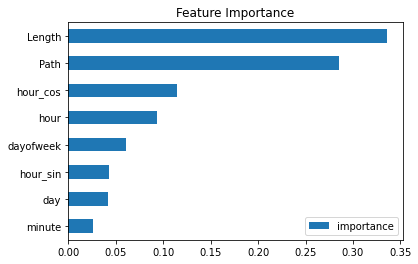

time: 906 ms (started: 2023-06-29 23:50:33 +03:00)


In [19]:
# Show how much each of the features was used in our regression analysis
plt.figure(figsize=(15,5))
fi = pd.DataFrame(data=reg.feature_importances_,index=reg.feature_names_in_,columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

### Forecast on test set

In [20]:
# Timeseries forecating on test set
y_pred = reg.predict(X_test)

time: 5.77 s (started: 2023-06-29 23:50:35 +03:00)


### Evaluate the results

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate the MAE
mae = mean_absolute_error(y_test, y_pred)
print("Mae is: ",mean_absolute_error(y_test, y_pred))

# Calculate RMSE score
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE score:", rmse)

Mae is:  2.293842943170047
RMSE score: 3.3637981273375046
time: 63 ms (started: 2023-06-29 23:50:41 +03:00)


In [22]:
y_test['pred'] = y_pred
y_test['p'] = X_test['Path']

time: 15 ms (started: 2023-06-29 23:50:41 +03:00)


C:\Users\SK\AppData\Local\Temp\ipykernel_1840\2639460208.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['pred'] = y_pred
C:\Users\SK\AppData\Local\Temp\ipykernel_1840\2639460208.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['p'] = X_test['Path']


<Axes: >

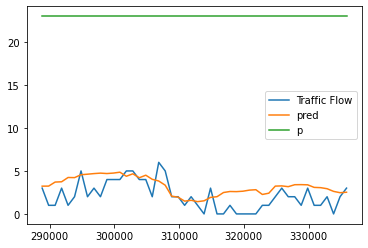

time: 843 ms (started: 2023-06-29 23:50:54 +03:00)


In [25]:
y_test[y_test['p']==23].plot()

### Train multiple XGboost models
Fit only the data of one path in each model

In [ ]:
# Define dataframe to save the scores
scores = pd.DataFrame(columns=['MAE','RMSE'],index=time_series.Path.unique())

In [ ]:
regressors = {}  # Dictionary to store regressor objects

for item in X_train['Path'].unique():
    
    sample = time_series[time_series['Path'] == item]
    
    # define train data
    s_train = sample.loc[sample['Time Column'] < '2008-05-24']
    s_train.sort_values(by='Time Column', inplace=True)

    # define test data
    s_test = sample.loc[sample['Time Column'] >= '2008-05-24']
    s_test.sort_values(by='Time Column', inplace=True)

    # define features
    s_features = ['Path', 'Length', 'hour', 'dayofweek', 'day', 'minute',
                'hour_sin', 'hour_cos','rolling_mean','rolling_std']

    # define labels
    s_labels = ['Traffic Flow']

    # create train set
    s_X_train = s_train[s_features]
    s_y_train = s_train[s_labels]

    # create test set
    s_X_test = s_test[s_features]
    s_y_test = s_test[s_labels]

    regressor_name = f"regressor_{item}"  # Name of the regressor
    
    print(regressor_name)
    
    regressors[regressor_name] = xgb.XGBRegressor(
        objective='reg:squarederror',
        n_estimators=5000,
        early_stopping_rounds=5,
        learning_rate=0.01,
        max_depth=3,
        colsample_bytree=0.8,
        gamma=0.3
    )
    
    # Train the XGBoost model with feature weights
    reg.fit(s_X_train, s_y_train, eval_set=[(s_X_train,s_y_train), (s_X_test,s_y_test)], verbose=False)
    
    # Timeseries forecating on test set
    y_pred = reg.predict(s_X_test)
    
    # Calculate the MAE
    mae = mean_absolute_error(s_y_test, y_pred)

    # Calculate RMSE score
    rmse = mean_squared_error(s_y_test, y_pred, squared=False)
    
    scores.at[item,'MAE'] = mae
    scores.at[item,'RMSE'] = rmse

In [ ]:
scores